In [15]:
import pandas as pd
import numpy as np

## Exploring Train Data

In [2]:
data = pd.read_csv("/Users/inakolluvishnusai/NLP/Project/quora-question-pairs 2/train.csv")

In [3]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
data.describe()

,id,qid1,qid2,is_duplicate
count,404290.000000,404290.000000,404290.000000,404290.000000
mean,202144.500000,217243.942418,220955.655337,0.369198
std,116708.614503,157751.700002,159903.182629,0.482588
min,0.000000,1.000000,2.000000,0.000000
25%,101072.250000,74437.500000,74727.000000,0.000000
50%,202144.500000,192182.000000,197052.000000,0.000000
75%,303216.750000,346573.500000,354692.500000,1.000000
max,404289.000000,537932.000000,537933.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


So there are two missing values in question2 and one missing value in question1 

In [6]:
data['is_duplicate'].value_counts()

is_duplicate
0    255027
1    149263
Name: count, dtype: int64

Data is not balance for duplicates and non duplicates 

<Axes: >

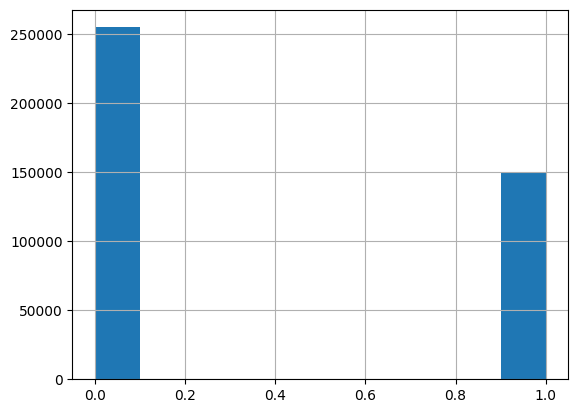

In [8]:
data["is_duplicate"].hist()

if we oversample data the model might over fit so i think removing 1,00,000 samples from the duplicates randomly might be a good option is what i am feeling

ChatGPT solution which is kinda interesting: "Use word embeddings to replace some words with their synonyms to increase diversity."

In [10]:
data.head(10)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0


In [11]:
data_df=data.copy()

In [12]:
# UnderSampling the data
data_df = pd.concat([
    data[(data.is_duplicate==1)],
    data[(data.is_duplicate==0)].iloc[:149263]
])

<Axes: >

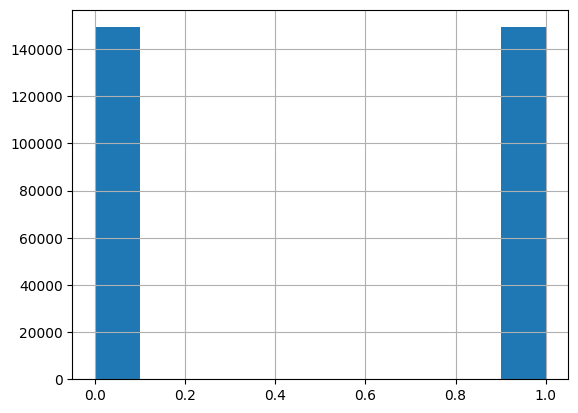

In [13]:
data_df["is_duplicate"].hist()

In [14]:
data_df['is_duplicate'].value_counts()

is_duplicate
1    149263
0    149263
Name: count, dtype: int64

So now the data is balanced

In [26]:
qid = pd.Series(data_df['qid1'].tolist() + data_df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 390791
Number of questions getting repeated 79271


In [27]:
qid

0             11
1             15
2             23
3             25
4             27
           ...  
597047    348915
597048    348919
597049    348921
597050    348923
597051    348924
Length: 597052, dtype: int64

In [28]:
qid = pd.Series(data['qid1'].tolist() + data['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 537933
Number of questions getting repeated 111780


In [29]:
qid

0              1
1              3
2              5
3              7
4              9
           ...  
808575    379845
808576    155606
808577    537929
808578    537931
808579    537933
Length: 808580, dtype: int64

- How many times each type of data is occuring
- How many time each question occured
- Handling Special Characters i can see some website tags and also special symbols need to check if it is important to keep them or not
-  Fuzzy Features
- 